# Motion Tracking 

In [1]:
pip install ikomia
pip install -r C:\Users\Cake\Ikomia\Plugins\Python\infer_yolo_v8_pose_estimation\requirements.txt

SyntaxError: invalid syntax (2537499753.py, line 1)

In [ ]:
#### package for showing an image, not neccessary

In [1]:
from PIL import ImageShow
ImageShow.register(ImageShow.IPythonViewer(), 0)

In [2]:
import os

def get_filenames_in_folder(folder_path):
    """
    Retrieves the filename of each item (files and directories) in the specified folder.

    Args:
    - folder_path: Path to the folder.

    Returns:
    - List of filenames.
    """
    filenames = []
    try:
        # Get list of items (files and directories) in the folder
        items = os.listdir(folder_path)
        for item in items:
            # Check if the item is a file
            if os.path.isfile(os.path.join(folder_path, item)):
                # Add filename to the list
                filenames.append(item)
    except OSError as e:
        print(f"Error: {e}")
    return filenames

if __name__ == "__main__":
    # Specify the folder path
    folder_path = 'E:/Motion Capture Videos/Videos/Videos/'

    # Get filenames in the folder
    filenames = get_filenames_in_folder(folder_path)

    # Display filenames
    print("Filenames in the folder:")
    for filename in filenames:
        print(filename)


Filenames in the folder:
20103_CMDSCRX0M2_CD6m_CE1-1m_DX1920_DY1080_FR30_YA113_PA00_ST03_TR01.mp4
20103_CMDSCRX0M2_CD6m_CE1-1m_DX1920_DY1080_FR30_YA113_PA00_ST03_TR02.mp4
20103_CMDSCRX0M2_CD6m_CE1-1m_DX1920_DY1080_FR30_YA158_PA00_ST03_TR01.mp4
20103_CMDSCRX0M2_CD6m_CE1-1m_DX1920_DY1080_FR30_YA158_PA00_ST03_TR02.mp4
20103_CMDSCRX0M2_CD6m_CE1-1m_DX1920_DY1080_FR30_YA203_PA00_ST03_TR01.mp4
20103_CMDSCRX0M2_CD6m_CE1-1m_DX1920_DY1080_FR30_YA203_PA00_ST03_TR02.mp4
20103_CMDSCRX0M2_CD6m_CE1-1m_DX1920_DY1080_FR30_YA248_PA00_ST03_TR01.mp4
20103_CMDSCRX0M2_CD6m_CE1-1m_DX1920_DY1080_FR30_YA248_PA00_ST03_TR02.mp4
20103_CMDSCRX0M2_CD6m_CE1-1m_DX1920_DY1080_FR30_YA293_PA00_ST03_TR01.mp4
20103_CMDSCRX0M2_CD6m_CE1-1m_DX1920_DY1080_FR30_YA293_PA00_ST03_TR02.mp4
20103_CMDSCRX0M2_CD6m_CE1-1m_DX1920_DY1080_FR30_YA338_PA00_ST03_TR01.mp4
20103_CMDSCRX0M2_CD6m_CE1-1m_DX1920_DY1080_FR30_YA338_PA00_ST03_TR02.mp4
20103_CMDSCRX0M2_CD6m_CE1-1m_DX1920_DY1080_FR30_YA68_PA00_ST03_TR01.mp4
20103_CMDSCRX0M2_CD6m_CE1-1

# Function to turn videos into a list of images

In [3]:
import cv2
import os

def video_to_images(video_path):
    # Ensure the provided video_path is an absolute path
    video_path = os.path.abspath(video_path)

    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Check if the video file was successfully opened
    if not cap.isOpened():
        print("Error: Could not open video file.")
        return []

    # Initialize an empty list to store the images
    images = []

    # Read and process each frame of the video
    while True:
        # Read a frame from the video
        ret, frame = cap.read()

        # If there are no more frames, break the loop
        if not ret:
            break

        # Convert the frame to RGB (OpenCV uses BGR by default)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Append the frame to the list of images
        images.append(frame_rgb)

    # Release the video capture object
    cap.release()

    return images

#Example usage:
#video_path = "E:/Motion Capture Videos/Videos/Videos/20103_CMDSCRX0M2_CD6m_CE1-1m_DX1920_DY1080_FR30_YA68_PA00_ST03_TR01.mp4"
#images = video_to_images(video_path)
#print("Number of frames extracted:", len(images))


In [ ]:
#Does not work!!
allVideos = []
for i in filenames:
    allVideos.append(video_to_images("E:/Motion Capture Videos/Videos/Videos/" + i))

# Function for getting the XY coordinates of captured points

In [4]:
from ikomia.dataprocess.workflow import Workflow
from ikomia.utils import ik
from ikomia.utils.displayIO import display
from ikomia.dataprocess import CKeypointsIO
def getPose(image):
    wf = Workflow()
    
    pose = wf.add_task(ik.infer_yolo_v8_pose_estimation(), auto_connect=True)
    
    wf.run_on(image)
    pointsList = []
    if len(pose.get_outputs()[1].get_objects()) == 0:
        pointsList.append((0,0))
    else:
        points = pose.get_outputs()[1].get_object(0).points
        if len(points) < 13:
            pointsList.append((0,0))
        else:
            for i in points:
              pointsList.append([i[0],(i[1].x, i[1].y)])
    return pointsList

### Helper dictionary
see labels.png for how the labels were determined

In [7]:
bodyDict = {17: 22, 16: 24, 15: 18, 14: 20, 13: 14, 12: 16, 11: 10, 10: 12,
     9: 6, 8: 8, 7: 2, 6: 4, 4: 0}

In [8]:
bodyDict2 = {17: "Rankle",16: "Lankle", 15: "Rknee", 14: "Lknee", 13: "Rhip", 12: "Lhip", 11: "Rwrist", 10: "Lwrist",
     9: "Relbow", 8: "Lelbow", 7: "Rshoulder", 6: "Lshoulder", 4: "Head"}

# Run the function for each frame and output to CSV

In [13]:
import csv
def makeCSV(filename):
    framePointsList = []
    images = video_to_images("E:/Motion Capture Videos/Videos/Videos/" + filename)
    for i in range(len(images)):
        framePointsList.append(getPose(images[i]))
        print(i)
    
    with open(filename + "_csv.csv", 'w', newline='') as csvfile:
        # Create a CSV writer object
        csvwriter = csv.writer(csvfile)
    
        # Write each inner list as a row in the CSV file
        csvwriter.writerow(["Head_x", "Head_y", "Rshoulder_x", "Rshoulder_y", "Lshoulder_x", "Lshoulder_y",
                            "Relbow_x", "Relbow_y", "Lelbow_x", "Lelbow_y", "Rwrist_x", "Rwrist_y",
                            "Lwrist_x", "Lwrist_y", "Rhip_x", "Rhip_y", "Lhip_x", "Lhip_y",
                            "Rknee_x", "Rknee_y", "Lknee_x", "Lknee_y", "Rankle_x", "Rankle_y",
                            "Lankle_x", "Lankle_y"])
        framePointsList.append((0,0))
        for row in framePointsList:
            rowList = [0,0,0,0,0,
                       0,0,0,0,0,
                       0,0,0,0,0,
                       0,0,0,0,0,
                       0,0,0,0,0,0]
            if row != (0,0):
                for r in row:
                    if r[0] in bodyDict:
                        rowList[bodyDict[r[0]]] = r[1][0]
                        rowList[bodyDict[r[0]] + 1] = r[1][1]
            csvwriter.writerow(rowList)

In [14]:
for i in filenames:
    makeCSV(i)


0: 384x640 (no detections), 102.8ms
Speed: 35.8ms preprocess, 102.8ms inference, 21.9ms postprocess per image at shape (1, 3, 384, 640)
Workflow Untitled run successfully in 8096.9498 ms.
0

0: 384x640 (no detections), 18.9ms
Speed: 2.0ms preprocess, 18.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Workflow Untitled run successfully in 696.5288 ms.
1

0: 384x640 (no detections), 17.9ms
Speed: 1.5ms preprocess, 17.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Workflow Untitled run successfully in 440.1254 ms.
2

0: 384x640 (no detections), 16.9ms
Speed: 2.0ms preprocess, 16.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
Workflow Untitled run successfully in 435.9715 ms.
3

0: 384x640 (no detections), 18.4ms
Speed: 2.0ms preprocess, 18.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Workflow Untitled run successfully in 426.3598 ms.
4

0: 384x640 (no detections), 17.9ms
Speed: 2.0ms preprocess, 17.9

# format the file to add frame numbers

In [312]:
import csv

def format_csv(input_file, output_file):


    # Open the input CSV file for reading
    with open(input_file, 'r', newline='') as csvfile:
        reader = csv.reader(csvfile)
        rows = list(reader)

    # Shift each entry in each row one column to the right
    for i in range(len(rows)):
        # Move each entry one position to the right
        rows[i].insert(0, str(i))
            
    # Open the output CSV file for writing
    with open(output_file, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        # Write the modified data to the output file
        writer.writerows(rows)


# Example usage:
input_file = 'output.csv'
output_file = 'output.csv'
format_csv(input_file, output_file)


Data shifted and written to 'output.csv' successfully.


# Testing (not essential)
This can be removed is desired. I used it for debugging purposes


0: 384x640 1 person, 70.0ms
Speed: 3.0ms preprocess, 70.0ms inference, 7.0ms postprocess per image at shape (1, 3, 384, 640)
Workflow Untitled run successfully in 1019.6502 ms.


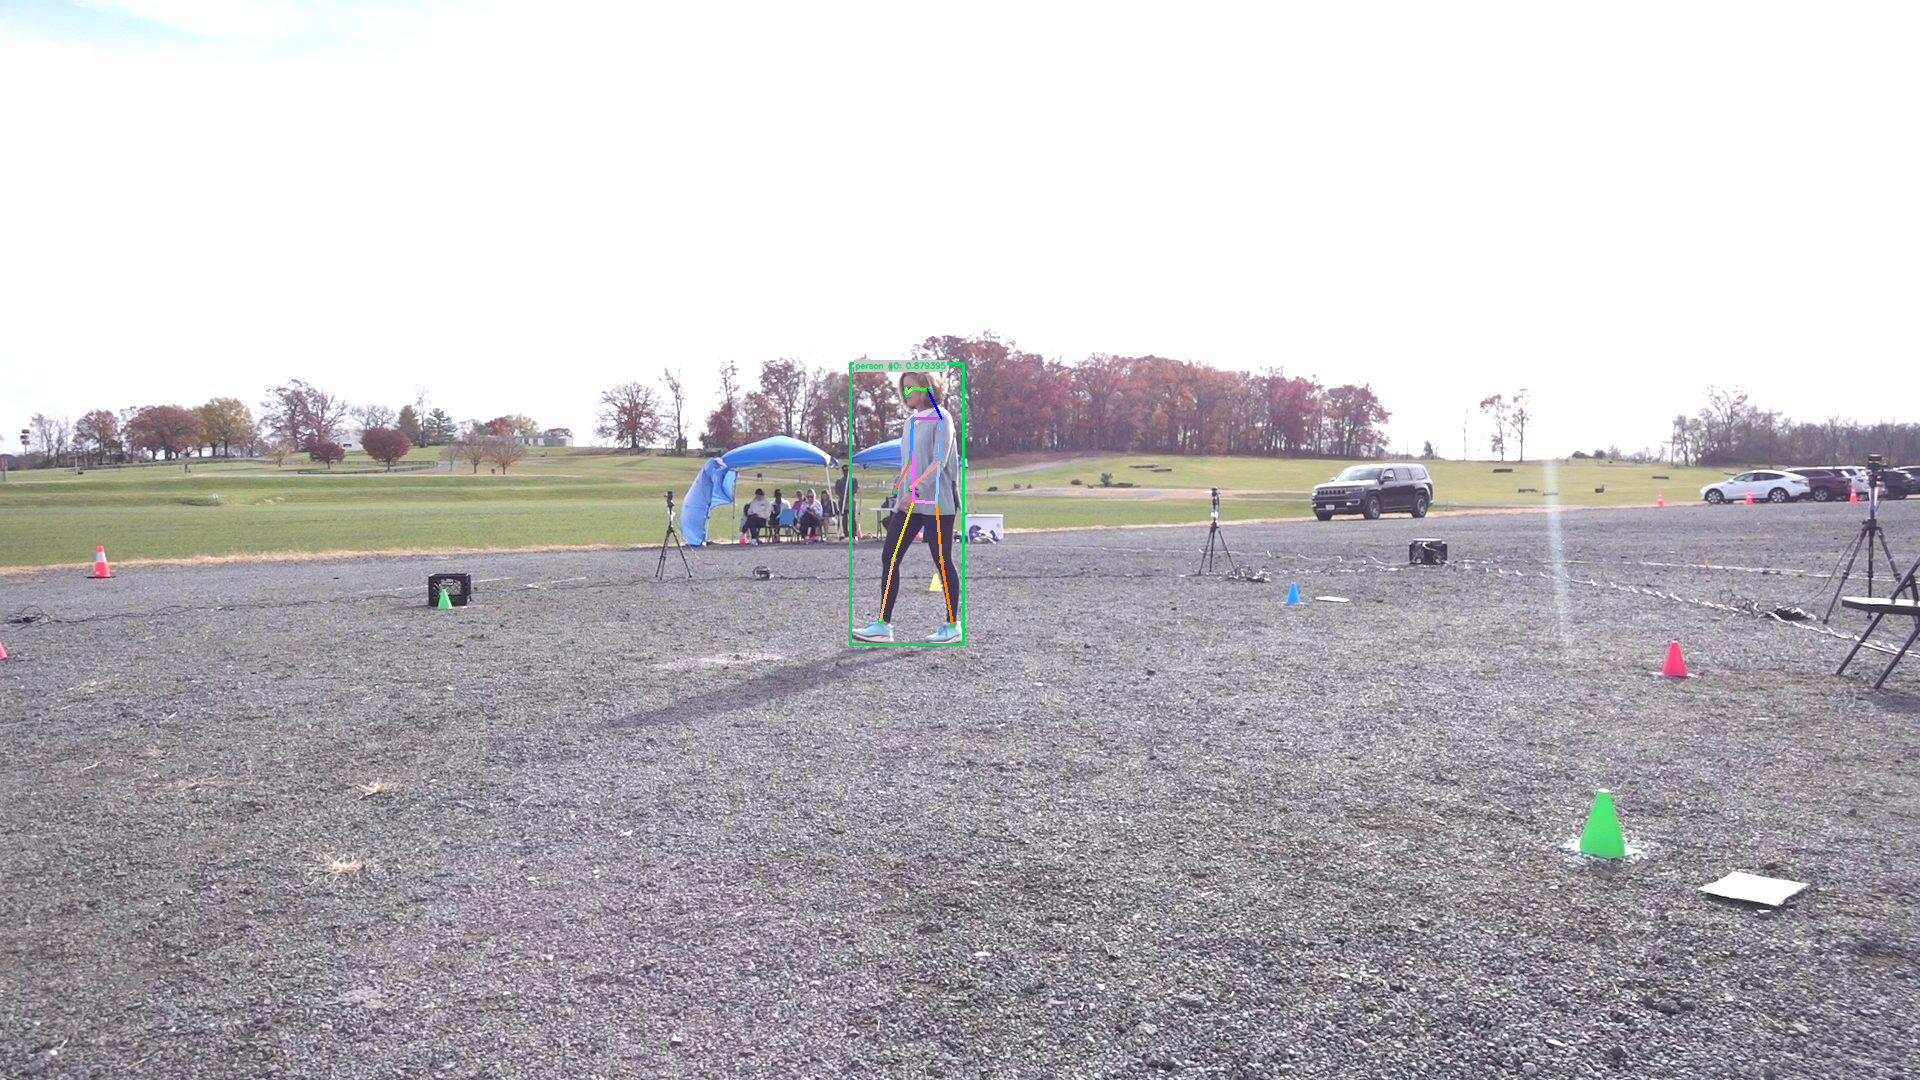

In [256]:
wf = Workflow()

pose = wf.add_task(ik.infer_yolo_v8_pose_estimation(), auto_connect=True)

wf.run_on(images[575])

display(pose.get_image_with_graphics())

print(len(pose.get_outputs()[1].get_objects()[0].points))